In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
def load_csv_as_df(file_name, sub_directories, column_numbers=None, column_names=None):
    base_path = os.getcwd()
    full_path = base_path + sub_directories + file_name
    if column_numbers is not None:
        df = pd.read_csv(full_path, usecols=column_numbers)
    else:
        df = pd.read_csv(full_path)
    if column_names is not None:
        df.columns = column_names

    return df 
train_df = load_csv_as_df('all-train-to-air-routes-with-cells.csv', '/')
air_df = load_csv_as_df('all-air-to-train-routes-with-cells.csv', '/')

In [ ]:
train_df.head()

,latitude,longitude,occupancy_status,route_end,route_number,route_start,taxi_id,time,cell,row,column
0,22.608000,114.032600,1,False,324340,True,30907,2018-11-25 06:27:58,12-20,12,20
1,22.608601,114.032097,1,False,324340,False,30907,2018-11-25 06:28:28,12-20,12,20
2,22.607599,114.029900,1,False,324340,False,30907,2018-11-25 06:28:58,12-20,12,20
3,22.606300,114.028099,1,False,324340,False,30907,2018-11-25 06:29:29,12-20,12,20
4,22.604000,114.024597,1,False,324340,False,30907,2018-11-25 06:29:59,12-20,12,20


In [ ]:
air_df.head()

,latitude,longitude,occupancy_status,route_end,route_number,route_start,taxi_id,time,cell,row,column
0,22.626467,113.810150,1,False,2199,True,dodBcDpez8w=,2016-06-13 12:03:02,12-16,12,16
1,22.625467,113.809464,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:03:24,12-16,12,16
2,22.625017,113.808647,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:03:31,12-16,12,16
3,22.614933,113.811600,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:04:53,12-16,12,16
4,22.613100,113.812599,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:05:03,12-16,12,16


In [ ]:
train_df_ids=train_df["route_number"].unique()
air_df_ids=air_df["route_number"].unique()

In [ ]:
print(len(train_df_ids))
print(len(air_df_ids))

44
26


In [ ]:
def find_routes_with_ten_readings(df, route_numbers, min_num_readings=10):
    routes = []
    
    for number in route_numbers:
        route_df = df[df['route_number'] == number]
        
        if len(route_df) >= min_num_readings:
            routes.append(route_df)
        else:
            print('Route: ', number, ' only has ', len(route_df), ' readings!')
    
    print('Found ', len(routes), ' routes that have 10+ readings')
    
    return pd.concat(routes)

In [ ]:
sample=find_routes_with_ten_readings(train_df,train_df_ids,min_num_readings=10)
sample.head()

Route:  5191  only has  2  readings!
Route:  5195  only has  2  readings!
Route:  5196  only has  2  readings!
Route:  5197  only has  2  readings!
Route:  5198  only has  2  readings!
Route:  5199  only has  2  readings!
Route:  11923  only has  4  readings!
Route:  37118  only has  8  readings!
Route:  84726  only has  2  readings!
Route:  84727  only has  2  readings!
Route:  84728  only has  2  readings!
Route:  84729  only has  2  readings!
Route:  84730  only has  2  readings!
Route:  84731  only has  2  readings!
Route:  84740  only has  2  readings!
Route:  84741  only has  2  readings!
Route:  84742  only has  2  readings!
Route:  84743  only has  2  readings!
Route:  84744  only has  2  readings!
Route:  84745  only has  2  readings!
Route:  84746  only has  2  readings!
Route:  84747  only has  2  readings!
Route:  84748  only has  2  readings!
Route:  84749  only has  2  readings!
Route:  84750  only has  2  readings!
Route:  84751  only has  2  readings!
Route:  84754  onl

,latitude,longitude,occupancy_status,route_end,route_number,route_start,taxi_id,time,cell,row,column
0,22.608000,114.032600,1,False,324340,True,30907,2018-11-25 06:27:58,12-20,12,20
1,22.608601,114.032097,1,False,324340,False,30907,2018-11-25 06:28:28,12-20,12,20
2,22.607599,114.029900,1,False,324340,False,30907,2018-11-25 06:28:58,12-20,12,20
3,22.606300,114.028099,1,False,324340,False,30907,2018-11-25 06:29:29,12-20,12,20
4,22.604000,114.024597,1,False,324340,False,30907,2018-11-25 06:29:59,12-20,12,20


In [ ]:
sample2=find_routes_with_ten_readings(air_df,air_df_ids,min_num_readings=10)
sample2.head()

Route:  46836  only has  2  readings!
Route:  46842  only has  5  readings!
Route:  46844  only has  2  readings!
Route:  122063  only has  2  readings!
Route:  384940  only has  3  readings!
Found  21  routes that have 10+ readings


,latitude,longitude,occupancy_status,route_end,route_number,route_start,taxi_id,time,cell,row,column
0,22.626467,113.810150,1,False,2199,True,dodBcDpez8w=,2016-06-13 12:03:02,12-16,12,16
1,22.625467,113.809464,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:03:24,12-16,12,16
2,22.625017,113.808647,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:03:31,12-16,12,16
3,22.614933,113.811600,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:04:53,12-16,12,16
4,22.613100,113.812599,1,False,2199,False,dodBcDpez8w=,2016-06-13 12:05:03,12-16,12,16


In [ ]:
def plot_route(df, route_number):
    route_data = df[df['route_number'] == route_number]

    long = route_data['longitude'].tolist()
    lat = route_data['latitude'].tolist()

    plt.plot(long, lat, color='r')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Route ' + str(route_number))
    plt.show()

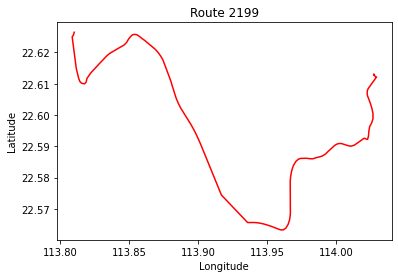

In [ ]:
plot_route(sample2,2199)

In [ ]:
# plot all routes
def plot_all_route_in(df):
  color_count=1
  cycle=plt.rcParams['axes.prop_cycle'].by_key()["color"]
  route_numbers=df["route_number"].unique()

  for route_number in route_numbers:
    route_data=df[df["route_number"]==route_number]

    long=route_data["longitude"].tolist()
    lat=route_data["latitude"].tolist()

    plt.plot(long,lat,color="r")
    color_count+=1

  plt.show()

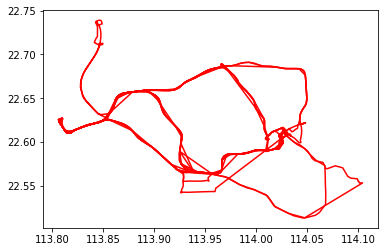

In [ ]:
plot_all_route_in(sample2)